In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import auc
path = os.getcwd() + '/'
from tables import open_file

In [3]:
resukt = []
energies = []
with open_file(path + 'result_detail.hdf5') as h5file:
    for group in h5file.root:
        table = h5file.get_node(group, "deposit")
        energy = table.attrs["values_macros_energy"]
        number = table.attrs["values_macros_number"]
        data = table.read()
        data = data["event"]#.sum(axis=0) / number
        resukt.append(data)
        energies.append(energy)
data = np.array(resukt) #сразу разбиты на 20 шайб
energies = np.array(energies) #энергии протонов, от 60 до 80 МэВ с шагом 0.05 МэВ

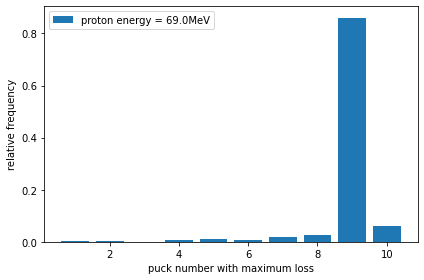

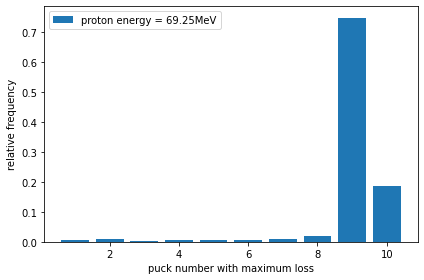

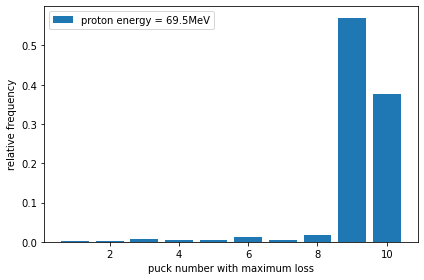

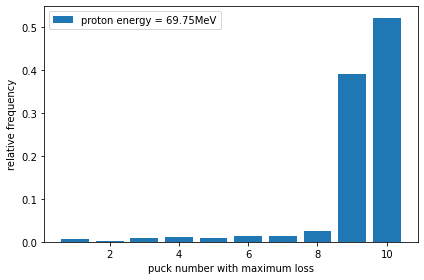

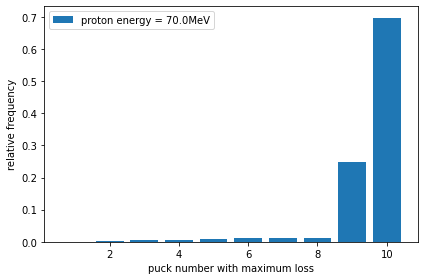

In [102]:
for number in [180, 185, 190, 195, 200]:
    peaks_position = np.zeros(len(data[number])) #позиция пика 
    for i, event in enumerate(data[number]):
        peaks_position[i] = np.argmax(event) + 1

    hist, bins = np.histogram(peaks_position, bins=range(1, 12), density=True)
    bins = np.delete(bins, -1)

    plt.bar(bins, hist, label='proton energy = ' + str(round(energies[number], 3)) + 'MeV')
    plt.legend()
    plt.ylabel('relative frequency')
    plt.xlabel('puck number with maximum loss')
    plt.tight_layout()
    #plt.savefig('peak_position_plots/bar_energy_' + str(round(energies[number], 3)) + '.png', dpi=300, transparent=True)
    plt.show()

In [130]:
energies[195],energies[225]

(69.74999999999945, 71.24999999999936)

In [126]:
histogram = np.zeros(10)
for number in range(147, 225+1):
    peaks_position = np.zeros(len(data[number])) #позиция пика 
    for i, event in enumerate(data[number]):
        peaks_position[i] = np.argmax(event) + 1

    hist, bins = np.histogram(peaks_position, bins=range(1, 12))
    bins = np.delete(bins, -1)
    histogram = histogram + hist

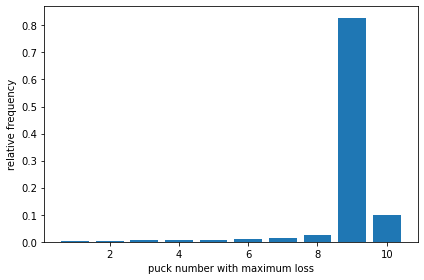

In [129]:
plt.bar(bins, histogram/sum(histogram))
plt.ylabel('relative frequency')
plt.xlabel('puck number with maximum loss')
plt.tight_layout()
#plt.savefig('peak_position_plots/bar_energy_sum_max_lower.png', dpi=300, transparent=True)

In [134]:
data_experiment = np.load('processed_data_10pucks.npy')
calibration = np.loadtxt('calibration_from_min_max_lower.txt')
n = len(data_experiment.T[:][:])
data_calibrated = np.zeros((n, 10))
for i in range(n):
    data_calibrated[i] = data_experiment.T[:][i]*calibration

<BarContainer object of 10 artists>

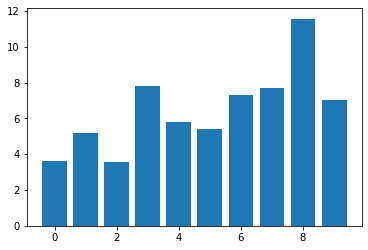

In [96]:
plt.bar(range(10), data_calibrated[17])

In [135]:
experiment_peaks_position=np.zeros(len(data_calibrated))
for i in range(len(data_calibrated)):
    event = data_calibrated[i]
    experiment_peaks_position[i] = np.argmax(event) + 1
    
hist, bins = np.histogram(experiment_peaks_position, bins=range(1, 12), density=True)
bins = np.delete(bins, -1)

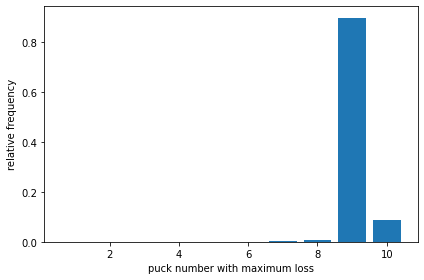

In [136]:
plt.bar(bins, hist)
plt.ylabel('relative frequency')
plt.xlabel('puck number with maximum loss')
plt.tight_layout()
#plt.savefig('peak_position_plots/bar_energy_calibr.png', dpi=300, transparent=True)